### Preprocessing BoardGameGeek.com Categorical Data

BoardGameGeek serves as a massive repository and online forum related to board games. The site captures a variety of features about each board game including their "meta-data" such as player counts, average play time, release details, as well as rankings and votes by online users.

This notebook transforms a pair of categorical attributes (Mechanic, Category) consisting of strings of multiple categories into a comprehensive series of binary attributes for more generalizable analysis.

It then creates a coorelation matrix plot to consider how the numerical features interact with one another.

In [1]:
#Import necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read file and display first five rows

bgg_file = 'bgg_db_2018_01_edit.csv'
bgg = pd.read_csv(bgg_file)
bgg.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
0,1,174430,Gloomhaven,1,4,150,90,150,2017,9.01310,8.52234,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7720
1,2,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66575,8.49837,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8056
2,3,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.65702,8.32401,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3538
3,4,12333,Twilight Struggle,2,2,180,120,180,2005,8.35188,8.21012,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5446
4,5,167791,Terraforming Mars,1,5,120,120,120,2016,8.38331,8.17328,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2465


In [3]:
#By default, the category attribute is a combination of numerous categories for each game.
#Since One Hot Encoding these features would create very unintutive features which are
#hyper-specific combinations of categories, we will instead split the category feature
#into a subset of features. 

c = bgg['category'].str.split(pat=',', expand=True)
c.columns = ['c_0','c_1','c_2','c_3','c_4','c_5',
            'c_6','c_7','c_8','c_9']

#Replace any NAs with an empty string
c = c.replace(np.nan, '', regex=True)
c_values = c[['c_0','c_1','c_2','c_3','c_4','c_5',
            'c_6','c_7','c_8','c_9']].values

#Out of the exhaustive lists of subset categories, get each unique category
#and create a list
unique_values =  np.unique(c_values)
cat_list = unique_values.tolist()
cat_list

#Remove leading or trailing empty characters 
i = 0
while i < len(cat_list):
    cat_list[i] = cat_list[i].strip()
    i = i + 1

#create an attribute for each unique category and set the value to 0 for each row
for cat in cat_list:
    bgg[cat] = 0 

In [4]:
#Repeat the above process for mechanics, which include more requisite splits

m = bgg['mechanic'].str.split(pat=',', expand=True)
m.columns = ['m_0','m_1','m_2','m_3','m_4','m_5',
            'm_6','m_7','m_8','m_9','m_10','m_11',
            'm_12','m_13','m_14','m_15','m_16','m_17']

m = m.replace(np.nan, '', regex=True)
m_values = m[['m_0','m_1','m_2','m_3','m_4','m_5',
            'm_6','m_7','m_8','m_9','m_10','m_11',
            'm_12','m_13','m_14','m_15','m_16','m_17']].values
unique_values =  np.unique(m_values)
mech_list = unique_values.tolist()
mech_list

i = 0
while i < len(mech_list):
    mech_list[i] = mech_list[i].strip()
    i = i + 1

for mech in mech_list:
    bgg[mech] = 0

In [5]:
#Keep the top 500 games
bgg = bgg.iloc[:500,:]
bgg.shape

(500, 153)

In [ ]:
#Iterate through the list of unique categories and if the name appears in the default category attribute,
#update the default 0 to 1 for the respective category name attribute.

row = 0
while row < len(bgg):
    for cat in cat_list:
        if (cat in bgg.iloc[row,15]):
            bgg.loc[:,cat][row] = 1       
    row = row + 1

In [ ]:
#Iterate through the list of unique mechanics and if the name appears in the default mechanic attribute,
#update the default 0 to 1 for the respective category name attribute.

row = 0
while row < len(bgg):
    for mech in mech_list:
        if (mech in bgg.iloc[row,13]):
            bgg.loc[:,mech][row] = 1       
    row = row + 1

In [8]:
#With the binary attributes completed, store the correlation values of the table for graphing

corr = bgg.corr()
corr_features = corr.iloc[:14,:14]
corr_features

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
rank,1.000000,-0.091021,0.072093,0.030808,-0.175113,-0.023673,-0.175113,0.033318,-0.588113,-0.927377,-0.407054,-0.237765,-0.388797,-0.267684
game_id,-0.091021,1.000000,-0.229830,0.033177,-0.089848,-0.245807,-0.089848,0.100915,0.373742,0.122369,-0.248781,0.127398,-0.158304,-0.089443
min_players,0.072093,-0.229830,1.000000,0.332866,-0.138380,-0.014018,-0.138380,-0.015609,-0.233387,-0.100220,0.091272,-0.026181,0.070339,-0.258862
max_players,0.030808,0.033177,0.332866,1.000000,-0.023061,-0.036170,-0.023061,0.066365,-0.118828,-0.034345,0.106413,0.008335,0.099390,-0.259046
avg_time,-0.175113,-0.089848,-0.138380,-0.023061,1.000000,0.663791,1.000000,-0.041335,0.421448,0.198785,-0.127720,0.271255,-0.139749,0.617065
min_time,-0.023673,-0.245807,-0.014018,-0.036170,0.663791,1.000000,0.663791,0.024838,0.247531,0.047496,-0.165138,0.236788,-0.179603,0.544137
max_time,-0.175113,-0.089848,-0.138380,-0.023061,1.000000,0.663791,1.000000,-0.041335,0.421448,0.198785,-0.127720,0.271255,-0.139749,0.617065
year,0.033318,0.100915,-0.015609,0.066365,-0.041335,0.024838,-0.041335,1.000000,0.010860,-0.018832,-0.022512,0.086364,-0.019041,-0.077944
avg_rating,-0.588113,0.373742,-0.233387,-0.118828,0.421448,0.247531,0.421448,0.010860,1.000000,0.657849,-0.074526,0.334212,-0.050273,0.516510
geek_rating,-0.927377,0.122369,-0.100220,-0.034345,0.198785,0.047496,0.198785,-0.018832,0.657849,1.000000,0.426487,0.239440,0.411057,0.300836


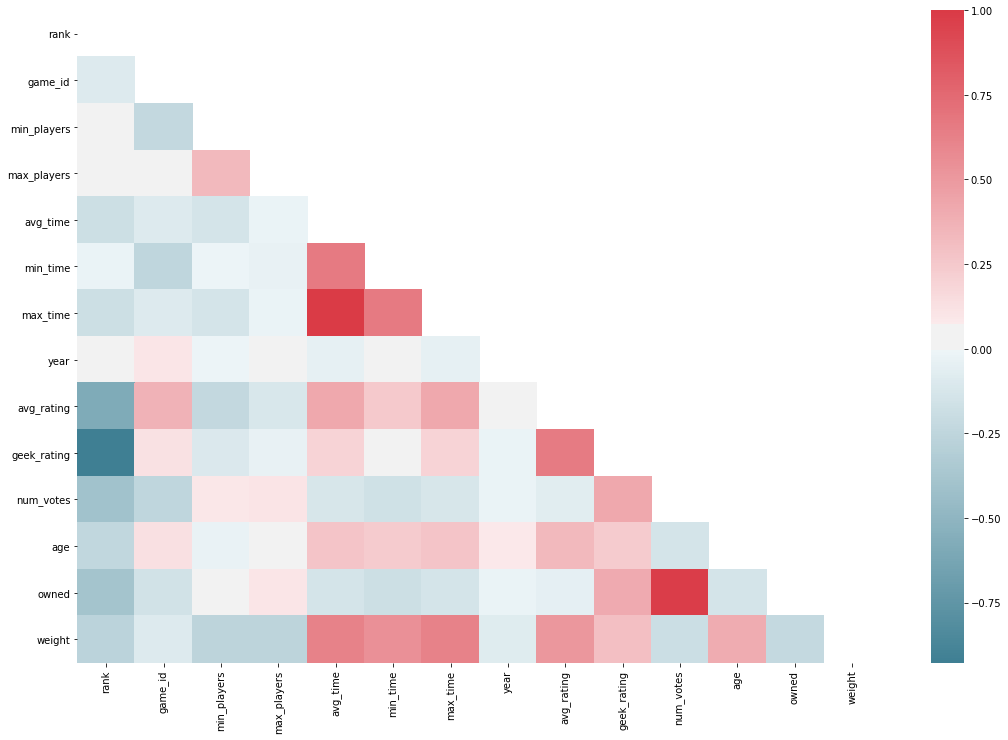

In [9]:
#Graph the correlation values, masking the top half to reduce redundancy and scale color

f, ax = plt.subplots(figsize=(18,12))
mask = np.triu(np.ones_like(corr_features, dtype=np.bool))
sns.heatmap(corr_features, xticklabels=corr_features.columns, yticklabels=corr_features.columns, mask=mask,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)